# Get the data and imports

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

File 'airline_passengers.csv' already there; not retrieving.



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pmdarima as pm

In [4]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df['LogPassengers'] = np.log(df['Passengers'])

In [6]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

# Model with AutoARIMA

In [21]:
# Function calculating RMSE
def rmse(y, yhat):
    return np.sqrt(np.mean((y - yhat)**2))

## Normal Model

In [13]:
model = pm.auto_arima(
    train['Passengers'],
    trace=True, # trace which models auto_arima is trying
    surpress_warnings=True, # surpress warnings
    seasonal=True, # use seasonal ARIMA
    m=12, # seasonality is 12 months
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.18 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.18 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=0.86 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.18 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.12 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.12 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.27 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.09 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.21 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [27]:
model.summary() # print model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Sun, 26 Feb 2023   AIC                            905.686
Time:                                    11:38:21   BIC                            919.623
Sample:                                         0   HQIC                           911.346
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

18.536468837522513


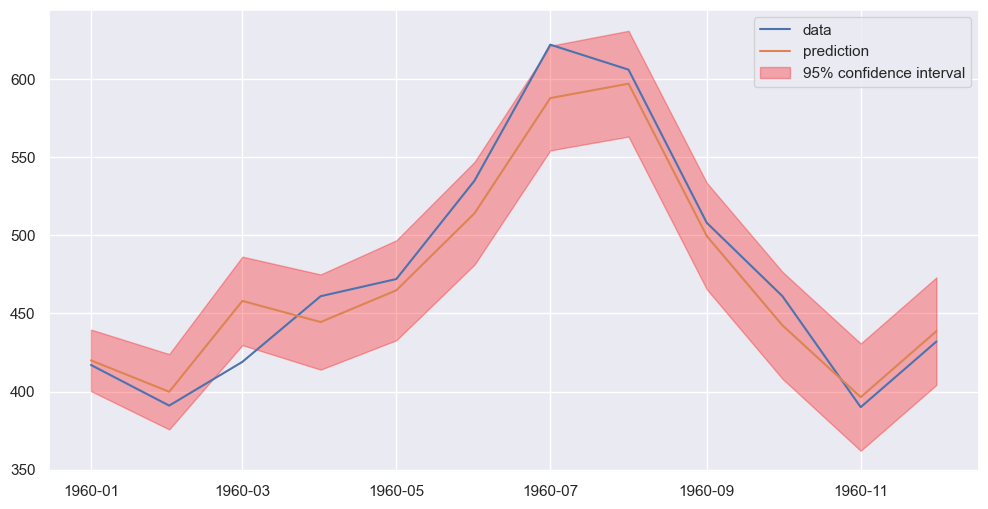

In [28]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True) # predict on test set and get confidence intervals for predictions (95% by default)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='prediction')
ax.fill_between(test.index, confint[:, 0], confint[:, 1], alpha=0.3, color='red', label='95% confidence interval')
ax.legend()

print(rmse(test['Passengers'], test_pred))

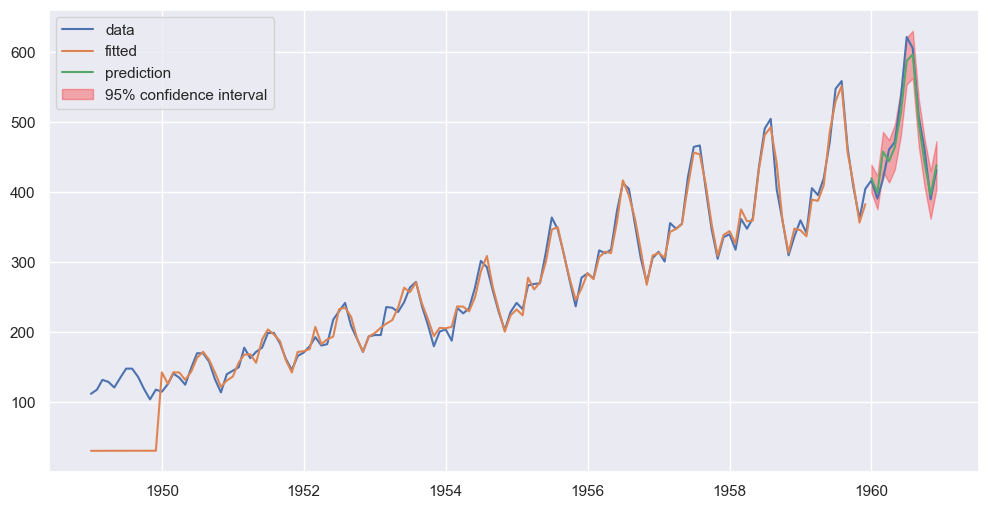

In [29]:
train_pred = model.predict_in_sample(start=0, end=-1) # predict on training set (in-sample) 

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['Passengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='prediction')
ax.fill_between(test.index, confint[:, 0], confint[:, 1], alpha=0.3, color='red', label='95% confidence interval')
ax.legend()

ax.legend()

## LogModel

In [30]:
logModel = pm.auto_arima(
    train['LogPassengers'],
    trace=True, # trace which models auto_arima is trying
    surpress_warnings=True, # surpress warnings
    seasonal=True, # use seasonal ARIMA
    m=12, # seasonality is 12 months
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-439.920, Time=1.07 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=0.45 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.29 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.01 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.330, Time=0.81 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.783, Time=0.36 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.328, Time=2.25 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.714, Time=0.93 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=2.66 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.571, Time=0.75 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.24 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-440.360, Time=0.93 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.576, Time=2.03 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [31]:
logModel.summary() # print model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Sun, 26 Feb 2023   AIC                           -448.052
Time:                                      11:38:58   BIC                           -434.114
Sample:                                           0   HQIC                          -442.392
                                              - 132                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0193      0.009      2.161      0.031       0.002       0.037
ar.L1          0.5998      0.083      7.263      0.000       0.438       0.762
ar.L2          0.2415      0.085      2.850      0.004       0.075       0.408
ma.S.L12      -0.5673      0.105     -5.418      0.000      -0.772      -0.362
sigma2         0.0012      0.000      8.191      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.11
Prob(Q):                              1.00   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

23.063224126108686


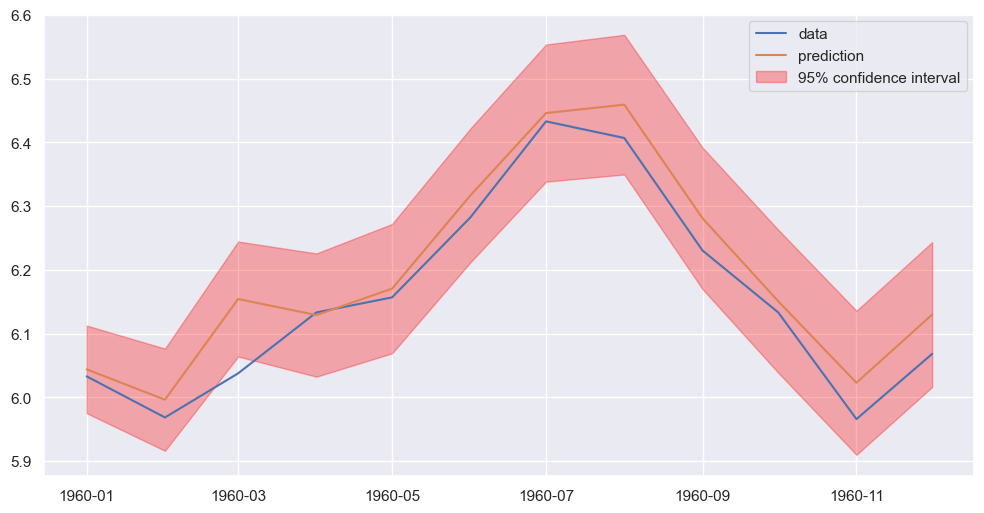

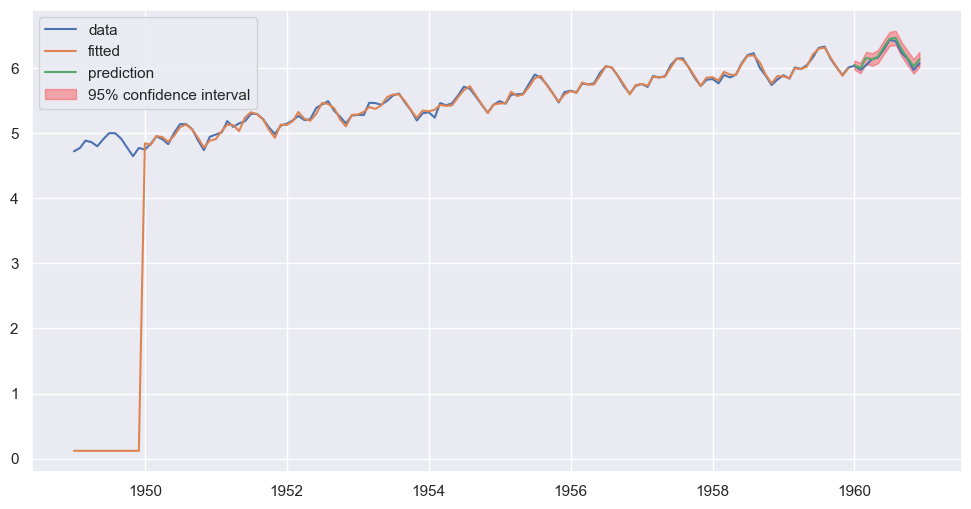

In [33]:
test_pred, confint = logModel.predict(n_periods=Ntest, return_conf_int=True) # predict on test set and get confidence intervals for predictions (95% by default)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred, label='prediction')
ax.fill_between(test.index, confint[:, 0], confint[:, 1], alpha=0.3, color='red', label='95% confidence interval')
ax.legend()

print(rmse(test['Passengers'], np.exp(test_pred)))

train_pred = logModel.predict_in_sample(start=0, end=-1) # predict on training set (in-sample) 

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='prediction')
ax.fill_between(test.index, confint[:, 0], confint[:, 1], alpha=0.3, color='red', label='95% confidence interval')
ax.legend()

ax.legend()

## Non-Seasonal Model

In [55]:
model = pm.auto_arima(
    train['Passengers'],
    trace=True, # trace which models auto_arima is trying
    surpress_warnings=True, # surpress warnings
    seasonal=False, # do NOT use seasonal ARIMA
    max_p=12, # max p is 12
    max_q=2, # max q is 2
    max_order = 14,
    stepwise=False, # use stepwise algorithm to find best model instead of grid search (faster)
    d=0, # no differencing
)

model.summary() # print model summary

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1867.156, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1278.850, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1277.627, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1282.305, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1272.828, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1273.413, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1273.512, Time=0.19 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=1274.468, Time=0.15 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(11, 0, 2)   Log Likelihood                -545.794
Date:                Sun, 26 Feb 2023   AIC                           1119.588
Time:                        11:53:58   BIC                           1159.947
Sample:                             0   HQIC                          1135.988
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9716      0.056     17.455      0.000       0.863       1.081
ar.L2         -0.8431      0.086     -9.809      0.000      -1.012      -0.675
ar.L3          0.7676      0.119      6.444      0.000       0.534       1.001
ar.L4         -0.6251      0.126     -4.945      0.000      -0.873      -0.377
ar.L5          0.6529      0.127      5.139      0.000       0.404       0.902
ar.L6         -0.7010      0.118     -5.957      0.000      -0.932      -0.470
ar.L7          0.7535      0.117      6.434      0.000       0.524       0.983
ar.L8         -0.8058      0.105     -7.681      0.000      -1.011      -0.600
ar.L9          0.8119      0.090      9.016      0.000       0.635       0.988
ar.L10        -0.8747      0.071    -12.311      0.000      -1.014      -0.735
ar.L11         0.8900      0.042     21.441      0.000       0.809       0.971
ma.L1          0.1656      0.084      1.967      0.049       0.001       0.331
ma.L2          0.8119      0.095      8.531      0.000       0.625       0.998
sigma2       210.5605     41.105      5.123      0.000     129.997     291.124
===================================================================================
Ljung-Box (L1) (Q):                  10.38   Jarque-Bera (JB):                11.15
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.11   Skew:                            -0.45
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

53.09124456289534


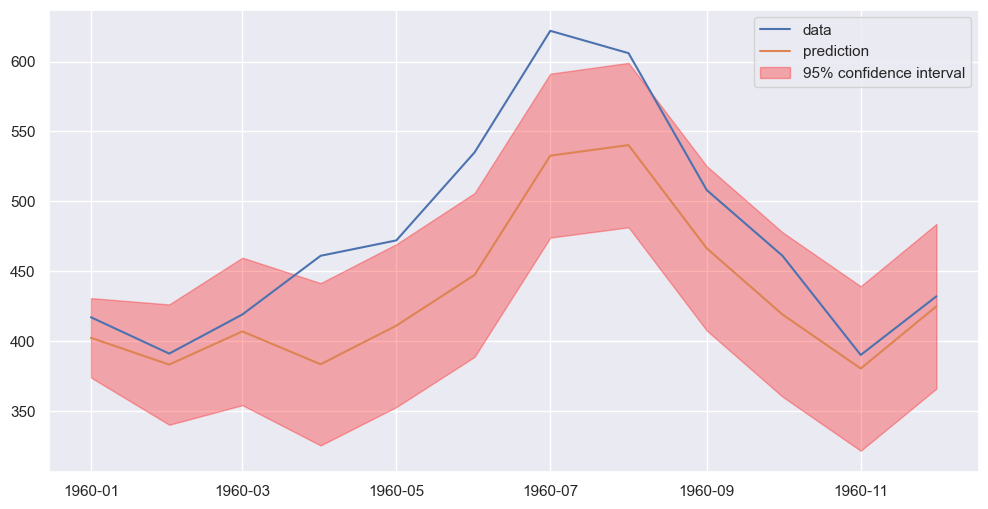

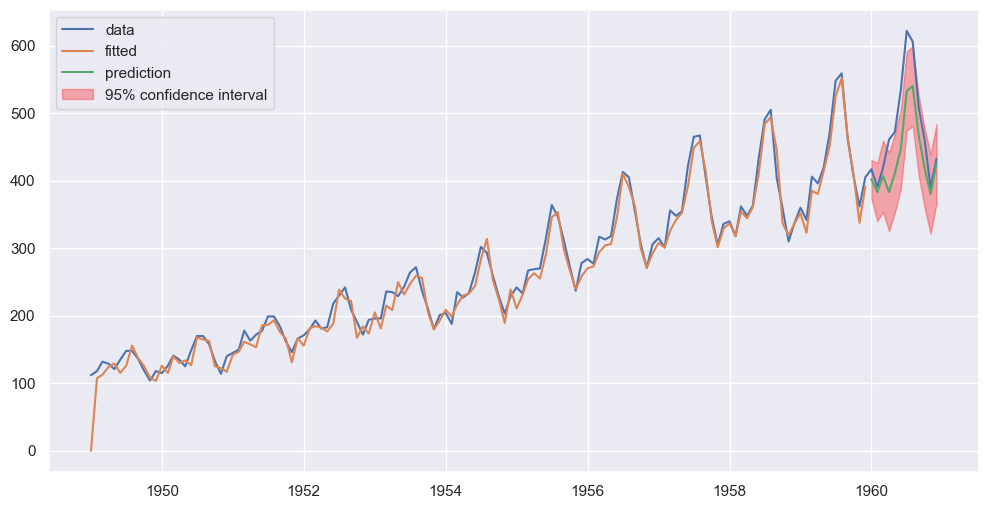

In [56]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True) # predict on test set and get confidence intervals for predictions (95% by default)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='prediction')
ax.fill_between(test.index, confint[:, 0], confint[:, 1], alpha=0.3, color='red', label='95% confidence interval')
ax.legend()

print(rmse(test['Passengers'], test_pred))

train_pred = model.predict_in_sample(start=0, end=-1) # predict on training set (in-sample) 

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['Passengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='prediction')
ax.fill_between(test.index, confint[:, 0], confint[:, 1], alpha=0.3, color='red', label='95% confidence interval')
ax.legend()

ax.legend()

In [59]:
logModel = pm.auto_arima(
    train['LogPassengers'],
    trace=True, # trace which models auto_arima is trying
    surpress_warnings=True, # surpress warnings
    seasonal=False, # do NOT use seasonal ARIMA
    max_p=12, # max p is 12
    max_q=2, # max q is 2
    max_order = 14,
    stepwise=False, # use stepwise algorithm to find best model instead of grid search (faster)
    d=0, # no differencingz
)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=826.758, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-209.510, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-211.836, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-207.781, Time=0.30 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-207.486, Time=0.32 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-207.577, Time=0.31 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-211.012, Time=0.28 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.42 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time

55.58822243873924


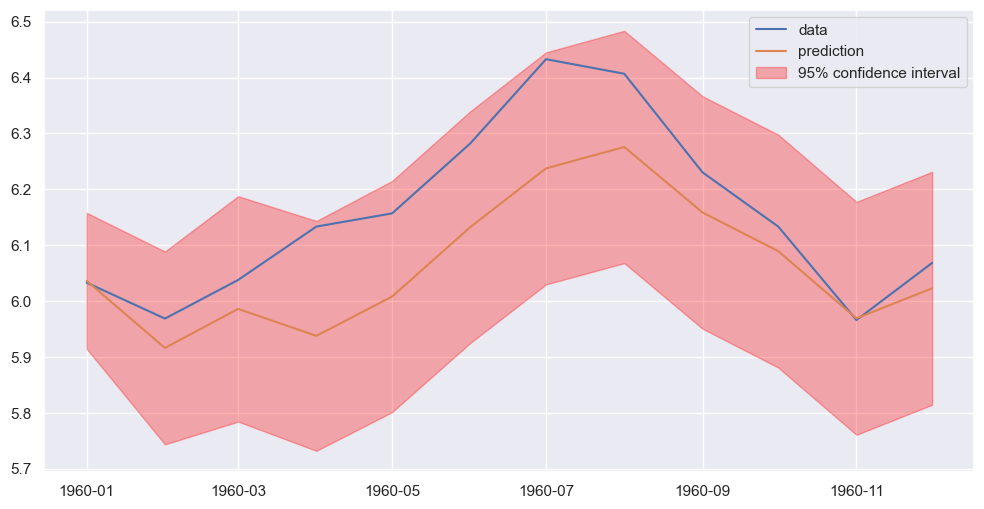

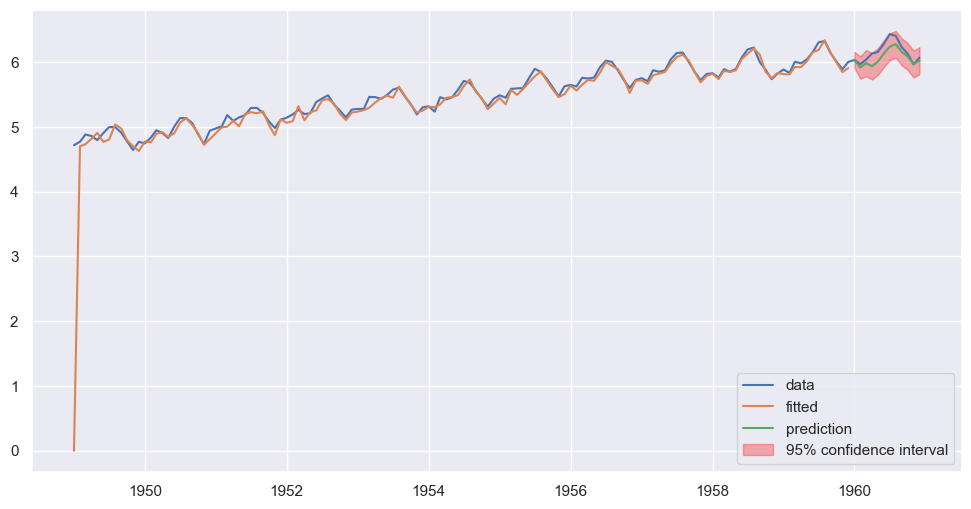

In [60]:
test_pred, confint = logModel.predict(n_periods=Ntest, return_conf_int=True) # predict on test set and get confidence intervals for predictions (95% by default)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred, label='prediction')
ax.fill_between(test.index, confint[:, 0], confint[:, 1], alpha=0.3, color='red', label='95% confidence interval')
ax.legend()

print(rmse(test['Passengers'], np.exp(test_pred)))

train_pred = logModel.predict_in_sample(start=0, end=-1) # predict on training set (in-sample) 

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='prediction')
ax.fill_between(test.index, confint[:, 0], confint[:, 1], alpha=0.3, color='red', label='95% confidence interval')
ax.legend()

ax.legend()